<a href="https://colab.research.google.com/github/Team-AlmaBetter/playstore-analysis/blob/Niharika/Copy_of_Playstore_Analysis_TeamProject_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Google Play Store? Well, from the mobile standpoint, it’s an app, though it’s actually a platform. So, it’s essentially far more than that, which is something we’ll get down to in a minute. In this article, we’ll talk about the Google Play Store, and try to answer quite a few questions, most of which are quite basic. That is the point of this article, to share as much information about Google’s Play Store platform as possible. So, let’s get started.

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.[2] Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

Lets take a look at the data, which consist of two file

*   Play store data.csv
*   user_review

# **Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# **Mount the Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path where the data is kept

path="/content/drive/MyDrive/Project/Play Store Data.csv"

# **1.Gathering data**

This step is about getting to know the data and understanding what has to be done before the data becomes useful in a particular context. This can be done by reading the CSV file and doing initial statistical analysis.
Though the dataset may seem to have the correct datatypes for each column, we need to check it. Inconsistent datatypes will create issues while dealing with problems.

In [4]:
# creating a dataframe for play store data.csv
user_review=pd.read_csv('/content/drive/MyDrive/Project/ User Reviews.csv')
df_Play_Store_duplicate_data = pd.read_csv(path)

In [5]:
# lets read the dataset df_Play_Store_duplicate_data

df_Play_Store_duplicate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Play store data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

# **2. Data cleaning**

**What is data cleaning?**

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

# **Step 1: Remove duplicate or irrelevant observations**
Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. Duplicate observations will happen most often during data collection. When you combine data sets from multiple places, scrape data, or receive data from clients or multiple departments, there are opportunities to create duplicate data. De-duplication is one of the largest areas to be considered in this process. Irrelevant observations are when you notice observations that do not fit into the specific problem you are trying to analyze. For example, if you want to analyze data regarding millennial customers, but your dataset includes older generations, you might remove those irrelevant observations. This can make analysis more efficient and minimize distraction from your primary target—as well as creating a more manageable and more performant dataset.


In [6]:
# Checking the duplicate rows 
duplicate_rows =df_Play_Store_duplicate_data[df_Play_Store_duplicate_data.duplicated()].count()
print(f'There are total Duplicate rows \n {duplicate_rows} ')


There are total Duplicate rows 
 App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64 


In [7]:
# Lets drop the duplicate rows
df_Play_Store= df_Play_Store_duplicate_data[~df_Play_Store_duplicate_data.duplicated()] 

In [8]:
# read the data of play store data after the removing duplicate data
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Print the total number of apps
print('Total number of apps in the dataset = ', df_Play_Store['App'].count())


Total number of apps in the dataset =  10358


# **Step 2: Filter unwanted outliers**
Often, there will be one-off observations where, at a glance, they do not appear to fit within the data you are analyzing. If you have a legitimate reason to remove an outlier, like improper data-entry, doing so will help the performance of the data you are working with. However, sometimes it is the appearance of an outlier that will prove a theory you are working on. Remember: just because an outlier exists, doesn’t mean it is incorrect. This step is needed to determine the validity of that number. If an outlier proves to be irrelevant for analysis or is a mistake, consider removing it.

In [10]:
# lets check the data 
df_Play_Store.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


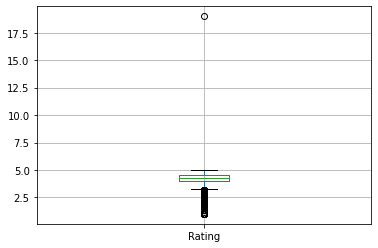

In [11]:
# lets plot the boxplot graph
df_Play_Store.boxplot()

As we can notice that ratings going till 17.5
Whereas the maximum rating is 5.

So there is an outlier.

So, lets check the rows which have rating more than 5

In [12]:
# checking rating more that 5

df_Play_Store[df_Play_Store['Rating']>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# lets drop this outlier 
df_Play_Store.drop([10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Checking the droped row is present or not
df_Play_Store.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


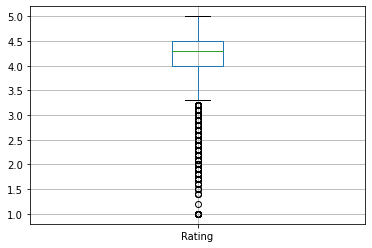

In [15]:
#lets check plot the graph again
df_Play_Store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59627aced0>]],
      dtype=object)

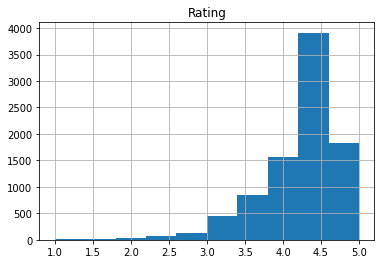

In [16]:
df_Play_Store.hist()

##Data Imputation and Manipulation
Fill the null values with appropriate values using aggreagate functions such as mean,median or mode.

In [17]:
def inpute_median(series):
  return series.fillna(series.median())#Define a function inpute_median

In [18]:
df_Play_Store.Rating = df_Play_Store['Rating'].transform(inpute_median)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df_Play_Store.isnull().sum()#count the number of null values to each column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
#modes of categorical values
print(df_Play_Store['Type'].mode())
print(df_Play_Store['Current Ver'].mode())
print(df_Play_Store['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [21]:
# Fill the missing categorical values with mode
df_Play_Store['Type'].fillna(str(df_Play_Store['Type'].mode().values[0]),inplace=True)
df_Play_Store['Current Ver'].fillna(str(df_Play_Store['Current Ver'].mode().values[0]),inplace=True)
df_Play_Store['Android Ver'].fillna(str(df_Play_Store['Android Ver'].mode().values[0]),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
df_Play_Store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###Converting Price and Installs into Numerical Values.

In [23]:
df_Play_Store['Price'] = df_Play_Store['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df_Play_Store['Price'] = df_Play_Store['Price'].apply(lambda x: float(x))#Removing '$' from the values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_Play_Store['Installs'] = df_Play_Store['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_Play_Store['Installs'] = df_Play_Store['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_Play_Store['Installs'] = df_Play_Store['Installs'].apply(lambda x: float(x))#Removing '+' from the values.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
df_Play_Store.info()#Check for missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.4+ MB


In [26]:
#  Checking the min installs and max installs
df_Play_Store['Installs'].min(),df_Play_Store['Installs'].max()

(0.0, 1000000000.0)

In [27]:
df_Play_Store['App'].value_counts()

ROBLOX                            9
8 Ball Pool                       7
Helix Jump                        6
Bubble Shooter                    6
Zombie Catchers                   6
                                 ..
R Bank                            1
Android Messages                  1
Texas Holdem Poker Pro            1
AE Jewels 2: Island Adventures    1
EO Mumbai                         1
Name: App, Length: 9659, dtype: int64

In [28]:
boolean = df_Play_Store['App'].duplicated().any()
boolean

True

##In the above mentioned data, some of the apps are having multiple rows. Let's check out if the data is identical or not.


In [29]:
df_Play_Store[df_Play_Store['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


###As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [30]:
df_Play_Store.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_Play_Store['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10357, dtype: object

In [32]:
df_Play_Store['Reviews'] = pd.to_numeric(df_Play_Store['Reviews'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_Play_Store = df_Play_Store.loc[df_Play_Store.groupby(['App'])['Reviews'].idxmax()]

In [34]:
df_Play_Store.describe()#Summary statistics after cleaning

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192463,2.168041e+05,7.798170e+06,1.097231
std,0.496055,1.831430e+06,5.376973e+07,16.851618
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#Checking any column which is having only 10% values to drop that column

In [35]:
# 10% rows of the column
length= len(df_Play_Store)*0.1
print(length)
df_Play_Store.dropna(thresh=length,axis=1,inplace=True)

965.9000000000001


In [36]:
# Checking the null values are being filled or not 
print(df_Play_Store.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [37]:
df_Play_Store.drop_duplicates(inplace=True)

Performing basic operation to check data cleaning is properly done or not

In [38]:
df_Play_Store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27,3.6M,500.0,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000.0,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000.0,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,10000.0,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,10000.0,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [39]:
df_Play_Store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.3,414,59M,100000.0,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,1000000.0,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,10000.0,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,1000000.0,Free,0.00,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up


In [40]:
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [41]:
df_Play_Store.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.192463,2.168041e+05,7.798170e+06,1.097231
std,0.496055,1.831430e+06,5.376973e+07,16.851618
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


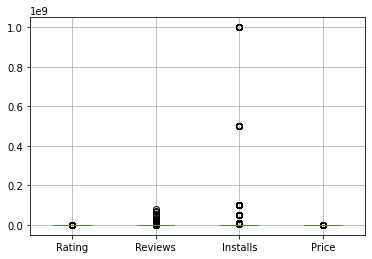

In [42]:
df_Play_Store.boxplot()

In [43]:
# Checking NAN and CAT values are perfectly filled or not
print(df_Play_Store.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


---
# **Exploratory Analysis and Visualization**
---

###Grouping all Apps storing in group

In [44]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [45]:
grp = df_Play_Store.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)#grouping all apps storing in grp

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.050000
EDUCATION              4.354206
ENTERTAINMENT          4.129885
EVENTS                 4.395313
FAMILY                 4.197439
FINANCE                4.138551
FOOD_AND_DRINK         4.191964
GAME                   4.247357
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.167123
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.201519
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.165125
PRODUCTIVITY           4.206150
SHOPPING               4.238119
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.074427
TRAVEL_AND_LOCAL       4.103196

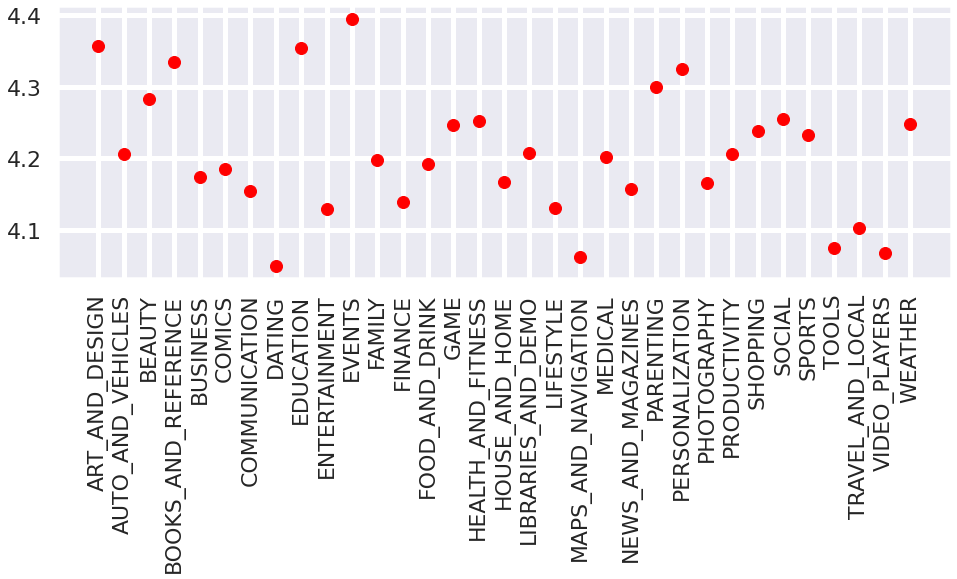

In [46]:
plt.figure(figsize=(16,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

##Category wise Rating

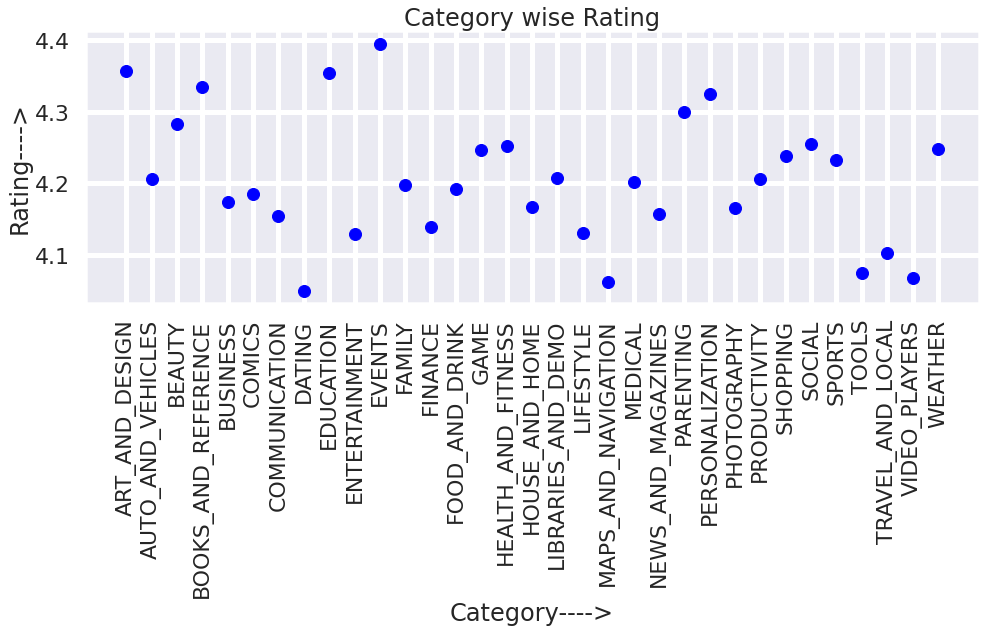

In [47]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color = 'b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Category---->')
plt.ylabel('Rating---->')
plt.show()

##The Events, Art and Design, Education Categories has got the highest Ratings i.e. 4 and above. Whereas, Dating, Maps and navigation, Video players category has got lowest ratings i.e. below 4.

##Category wise Pricing

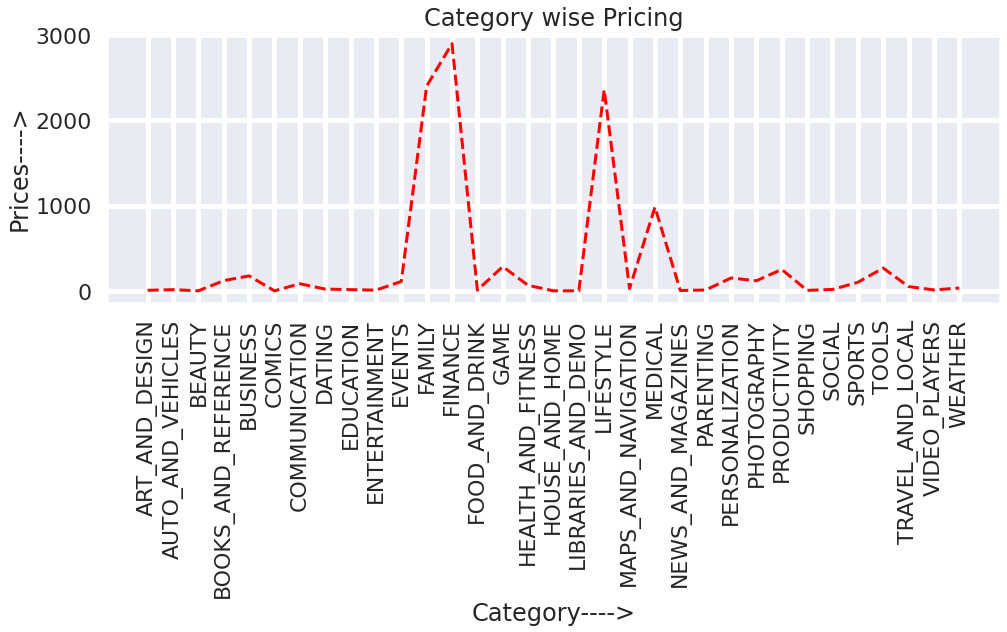

In [48]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Category---->')
plt.ylabel('Prices---->')
plt.show()

##The Finance, Lifestyle and Medical Category has got the highest pricing.

##Category wise Reviews

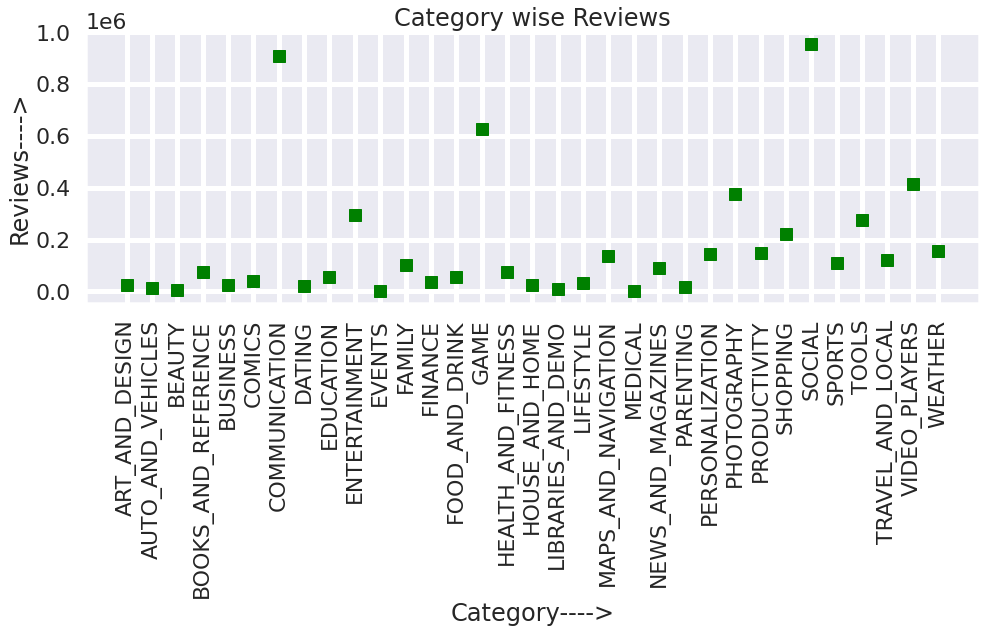

In [49]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Category---->')
plt.ylabel('Reviews---->')
plt.show()

##The Social, communication and Game category got the highest Reviews.

## Total Number of Apps having 5 star Rating

In [50]:
#To find total number of Apps having 5 star Rating
temp = len(df_Play_Store[df_Play_Store['Rating']==5.0])
print(f'The total no. of App that have 5 star rating = {temp} ')

The total no. of App that have 5 star rating = 271 


# **Free vs Paid Apps in Pie Chart**

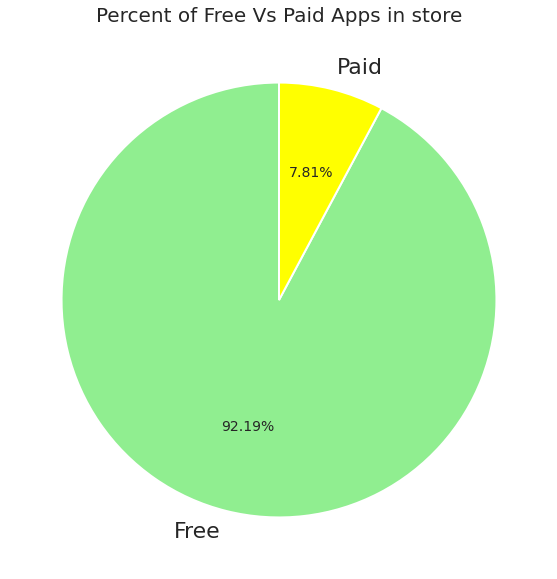

In [51]:
## Total number of free and paid apps
plt.figure(figsize=(10,10))
labels =df_Play_Store['Type'].value_counts().index
sizes = df_Play_Store['Type'].value_counts(sort = True)
colors = ["lightgreen","yellow"]
explode = [0.2,0]
plt.pie(sizes,labels=labels, colors=colors,startangle=90,autopct="%.2f%%")
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()


---

###Distribution of App Rating

---


In [52]:
# to remove null values from size column
df_Play_Store.loc[df_Play_Store['Size'].isnull(),'Size']=0
df_Play_Store = df_Play_Store.loc[df_Play_Store.groupby(['App'])['Reviews'].idxmax()]

In [53]:
# Setting parameter for plotting the graph
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [54]:
# checking the top 20 apps of the list
top_genres = df_Play_Store.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [55]:
genres_installs = df_Play_Store.groupby(['Genres'])[['Installs']].sum()

In [56]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

In [57]:
genres_ratings_df = df_Play_Store.groupby(['Genres'])[['Rating']].mean()

In [58]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')


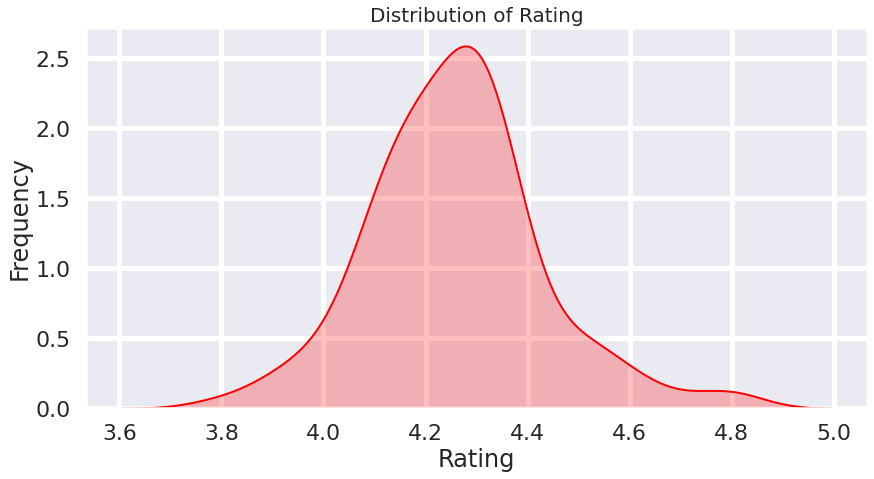

In [59]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

# **Highest rated geners**

In [60]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [61]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


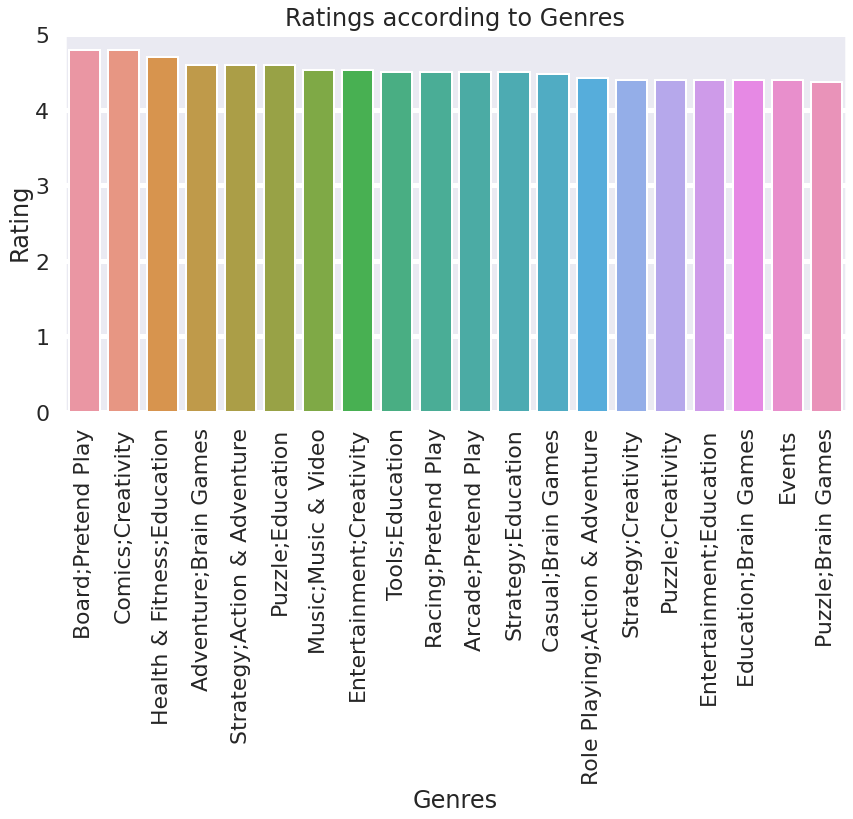

In [62]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

# **Lowest rated geners**

In [63]:
genres_installs_ratings.sort_values('Rating', ascending =True, inplace=True)

In [64]:
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]
# print(lowest_rated_genres)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


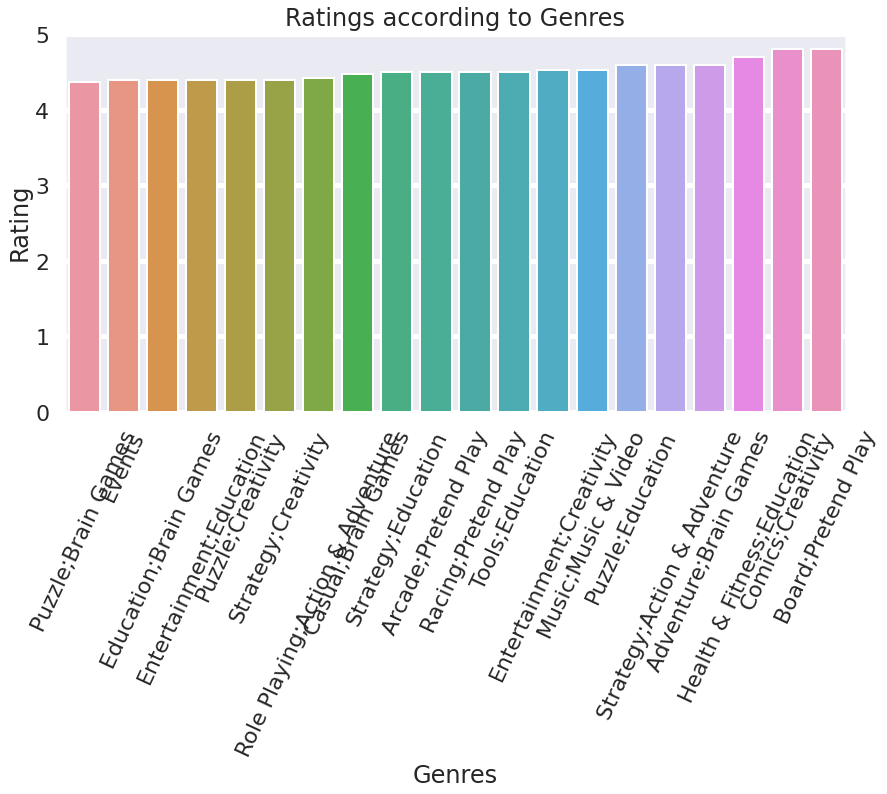

In [65]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

---
###Distribution of App Size

---


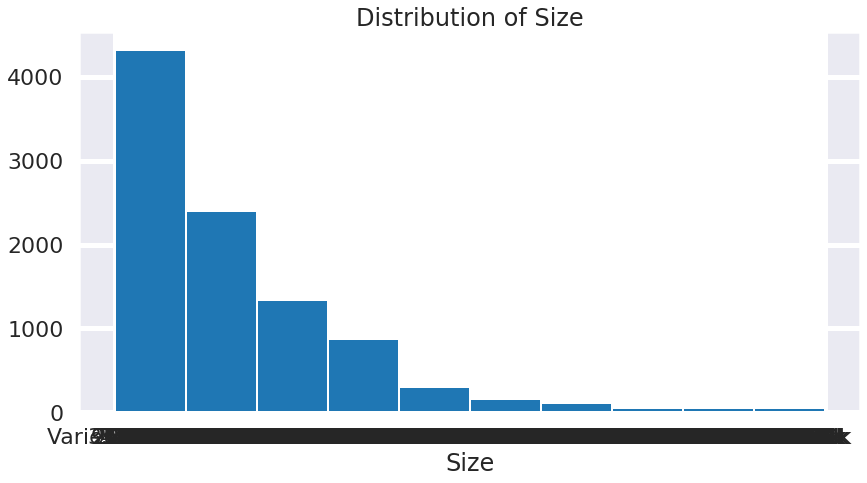

In [66]:

plt.figure(figsize=(14,7))
plt.xlabel('Size')
plt.title("Distribution of Size")
plt.hist(df_Play_Store['Size']);
plt.show()

# **Count of apps in each category**

In [67]:
y = df_Play_Store['Category'].value_counts()
x = df_Play_Store['Category'].value_counts().index
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

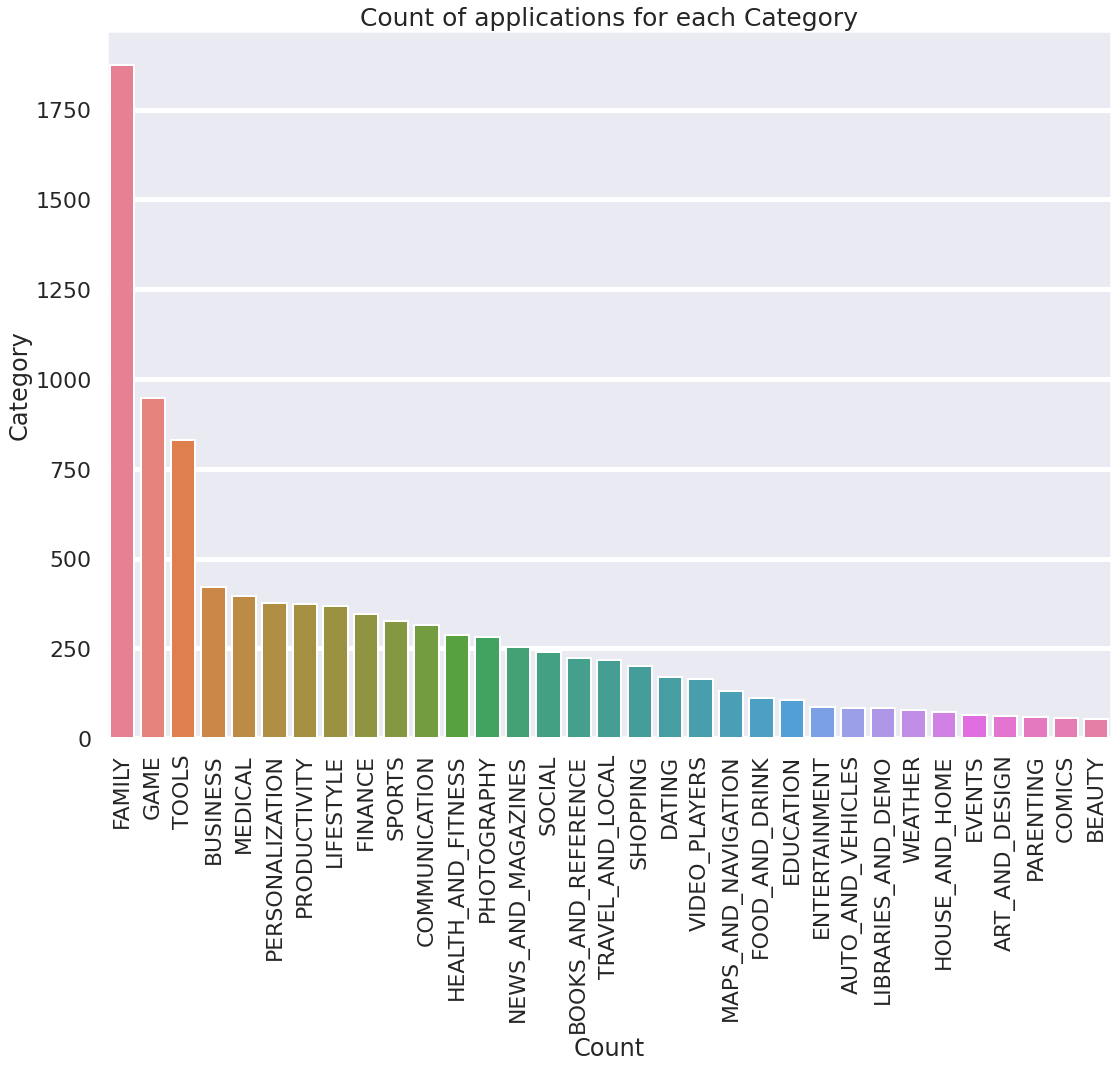

In [68]:
plt.figure(figsize=(18,13))
plt.xticks(rotation=90)
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Count of applications for each Category", fontsize = 25);

---
###Number of installed applications for each Category

---



In [69]:
top_category = df_Play_Store.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [70]:
category_installs = df_Play_Store.groupby(['Category'])[['Installs']].sum()

In [71]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


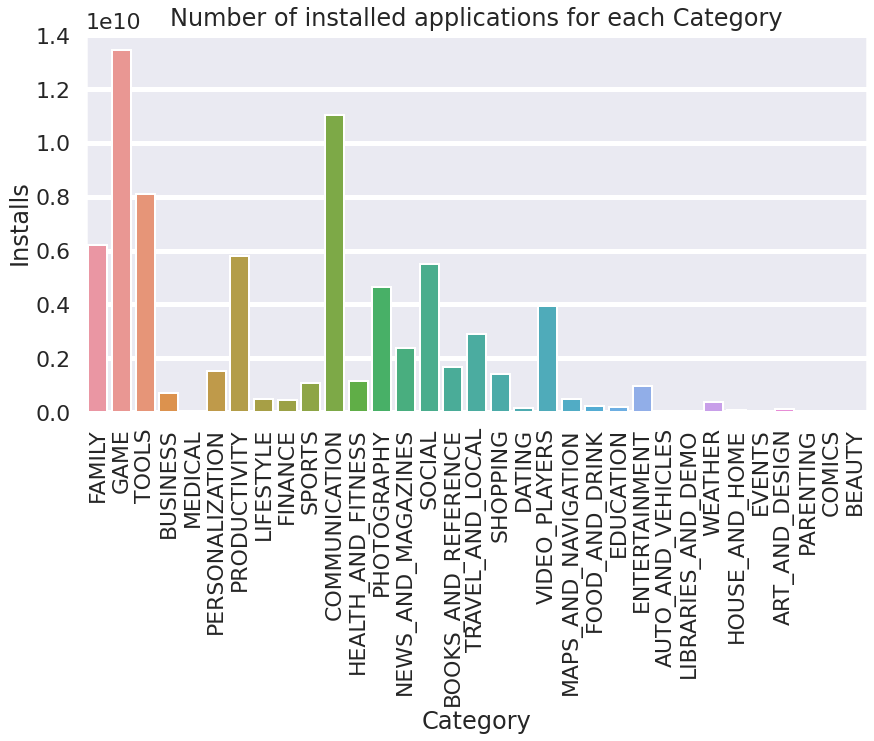

In [72]:
#  Number of installed application for each category.
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)

---
###Number of installs type wise according to Category

---

In [73]:
df_Play_Store['Gaming Category App'] = df_Play_Store['Category']=='GAME'

In [74]:
categoty_type_installs = df_Play_Store.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [75]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


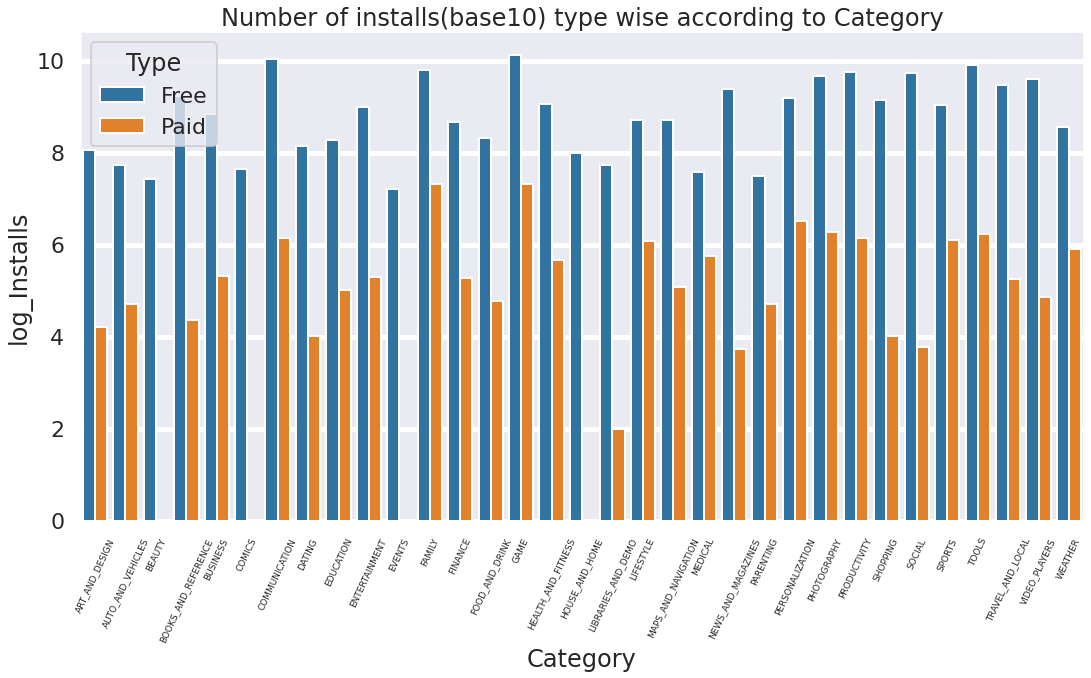

In [76]:
# Number of installs type according to  each Category
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

# Q	What is the Count of apps in each category

In [101]:
df_Play_Store.groupby(['Category'])['App'].count().sort_values(ascending=False).reset_index()

,Category,App
0,FAMILY,1874
1,GAME,946
2,TOOLS,829
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


## Total number of free and paid apps

In [77]:
df_Play_Store['Type'].value_counts()# To know the total number of free and paid apps.

Free    8905
Paid     754
Name: Type, dtype: int64

# **The App that got highest price**

In [78]:
temp= df_Play_Store['App'][df_Play_Store.Price==df_Play_Store['Price'].max()].iloc[0]
print(f'The App that have the highest price is\n{temp}')

The App that have the highest price is
I'm Rich - Trump Edition


# **The App that got lowest price**

In [79]:
temp =list( df_Play_Store['App'][df_Play_Store.Price==df_Play_Store['Price'].min()].values)
print(f'The app that have the lowest price are {len(temp)} apps ')

The app that have the lowest price are 8905 apps 


###The Average rating of free and paid apps

In [80]:
df_Play_Store.groupby('Type')['Rating'].mean()#To find the average rating of free and paid apps 

Type
Free    4.185918
Paid    4.269761
Name: Rating, dtype: float64

# **Relation between app category and app price**
So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.

Text(0.5, 1.0, 'App pricing trend across categories')

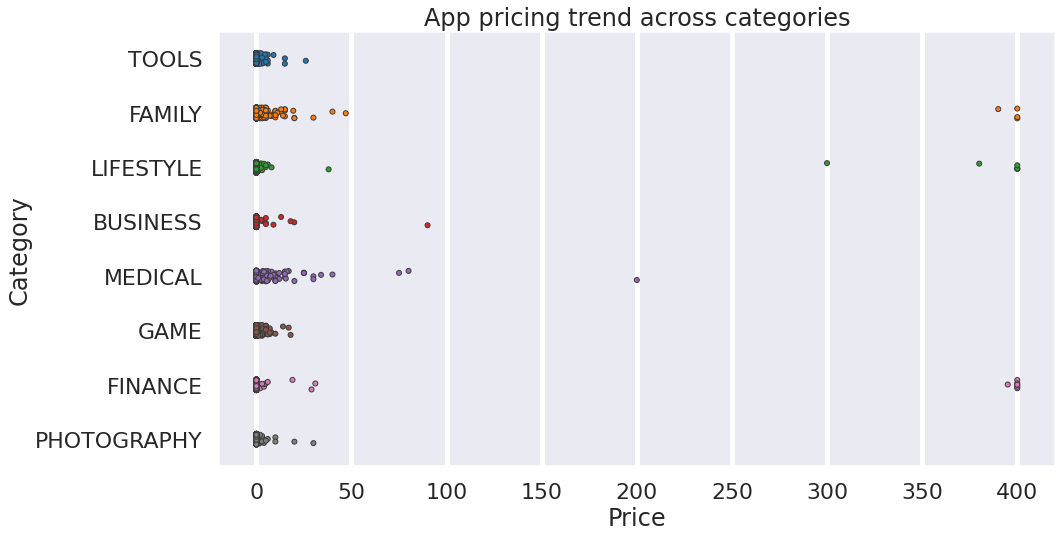

In [104]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = df_Play_Store[df_Play_Store.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')



# Q  What are top 10  expensive app

In [88]:
df_Play_Store.sort_values(by=['Price','App'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Gaming Category App
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,False
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,False
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,False
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0,40M,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,False
5359,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,False
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,False
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,False
5358,I am Rich!,FINANCE,3.8,93,22M,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,False
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,False
5369,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,False


---
###Distribution of Subjectivity"

---

In [81]:
merged_df = df_Play_Store.merge(user_review, on="App")

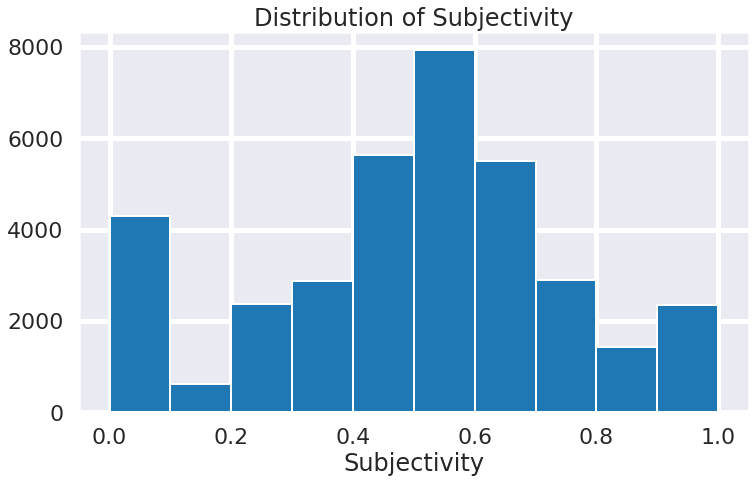

In [82]:
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

---
###A Pie Chart Representing Review Sentiments in Percentage
---

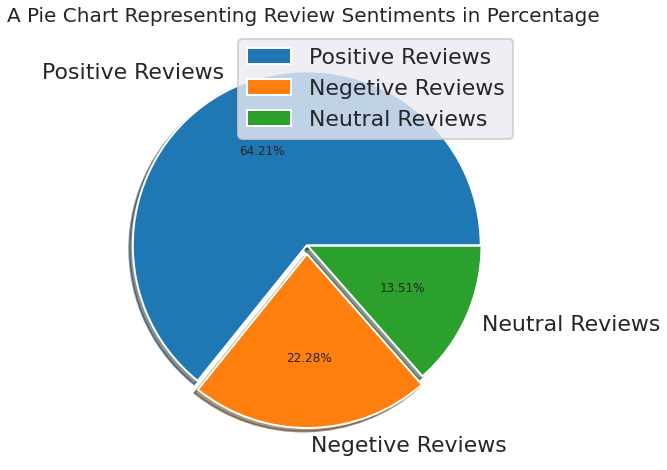

In [83]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Review Sentiments in Percentage ', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

How sentiment is divided for different type of reviews?




*It can be seen from the above plot that the number of positive reviews are way higher than negative and neutral ones*.

# **Does sentiment_subjectivity proportional to sentiment_polarity?**

In [84]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [85]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [86]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


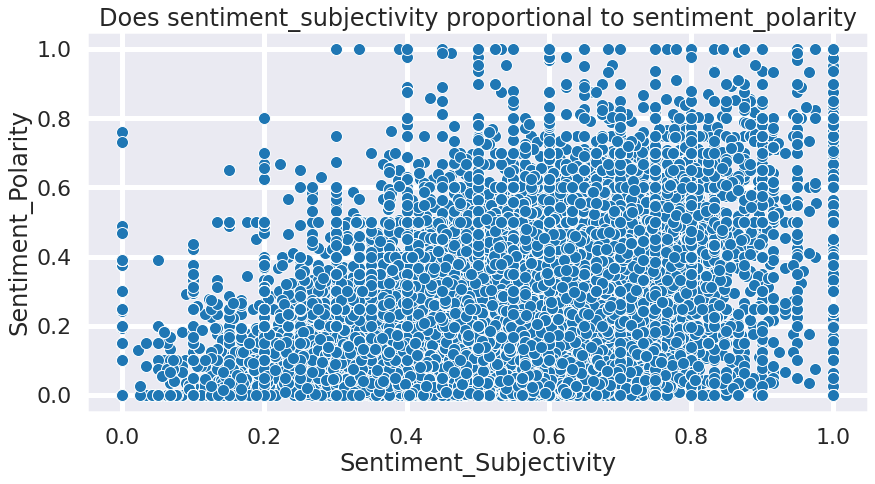

In [87]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

# **Questions and Answers**